In [2]:
%%capture
!pip install xarray[complete]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import xarray as xr
import numpy as np
import pandas as pd
import joblib

# Downdloading Data from Weatherbench2

In [12]:
# @title Authentication for GCloud Bucket
from google.colab import auth
auth.authenticate_user()

In [4]:
# @title WeatherBench2 Files
forecast_path = {
    "graphcast": "gs://weatherbench2/datasets/graphcast_hres_init/2020/date_range_2019-11-16_2021-02-01_12_hours-64x32_equiangular_conservative.zarr",
    "pangu": "gs://weatherbench2/datasets/pangu_hres_init/2020_0012_64x32_equiangular_conservative.zarr",
    "neuralgcm": "gs://weatherbench2/datasets/neuralgcm_deterministic/2020-64x32_equiangular_conservative.zarr",
    # "fuxi": "gs://weatherbench2/datasets/fuxi/2020-64x32_equiangular_conservative.zarr" data not complete,
    "keisler": "gs://weatherbench2/datasets/keisler/2020-64x32_equiangular_conservative.zarr",
    "ifshres": "gs://weatherbench2/datasets/hres/2016-2022-0012-64x32_equiangular_conservative.zarr"
}

era5_path = "gs://weatherbench2/datasets/era5/1959-2023_01_10-6h-64x32_equiangular_conservative.zarr"


In [7]:
# @title Downloading Forecasts
def save_aiwp_data(forecast_path, variable, level, lead_times):

    for lead_time in lead_times:
        print(f"Lead Time: {lead_time}")

        all_datasets = []

        for name, dataset in forecast_path.items():
            sliced =  (
                xr.open_zarr(dataset)[variable]
                .sel(
                    level=level,
                    prediction_timedelta=np.timedelta64(lead_time, 'h'),
                    time=slice('2020-01-01T00:00:00','2020-12-31T12:00:00')
                )
                .expand_dims(dim={'dataset': [name]})
            )
            # convert time from init_time to valid_time so can be compared to era5.
            # this means valid_time is from 2020-01-04T00:00:00 to 2021-01-04T00:00:00
            sliced = sliced.assign_coords(time=(sliced.time + sliced.prediction_timedelta))
            print(sliced.sizes)
            print(sliced.time.values.min())
            print(sliced.time.values.max())

            all_datasets.append(sliced)

        merged_datasets = xr.concat(all_datasets, dim='dataset', coords={'dataset': list(forecast_path.keys())})
        print(merged_datasets.sizes)

        dataframes = []
        for dataset in list(forecast_path.keys()):

            df = merged_datasets.sel(dataset=dataset).to_dataframe()[[variable]]
            df.columns = [dataset]
            dataframes.append(df)

        merged_datasets_df = pd.concat(dataframes, axis=1)
        merged_datasets_df.reset_index(inplace=True)
        merged_datasets_df['area_weight'] = np.cos(np.deg2rad(merged_datasets_df['latitude']))
        merged_datasets_df

        # from google.colab import drive
        # drive.mount('/content/drive')
        # drive_data_path = "/content/drive/Shareddrives/Ishango/Programs/AIMS_MSc_Theses_Supervision/AIWP/Project26_MLStacking/data/oliver/"

        drive_data_path = "/content/drive/MyDrive/MastersProject/Data/"
        merged_datasets_df.to_pickle(f"{drive_data_path}aiwp_ml_setup_{level}{variable}_32x64_2020_leadtime{lead_time}.pkl")


save_aiwp_data(forecast_path, "geopotential", level=500, lead_times=[24, 48, 72, 96, 120, 144, 168, 192, 216, 240])


Lead Time: 24


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-02T00:00:00.000000000
2021-01-01T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-02T00:00:00.000000000
2021-01-01T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-02T00:00:00.000000000
2021-01-01T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-02T00:00:00.000000000
2021-01-01T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-02T00:00:00.000000000
2021-01-01T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 48


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-03T00:00:00.000000000
2021-01-02T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-03T00:00:00.000000000
2021-01-02T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-03T00:00:00.000000000
2021-01-02T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-03T00:00:00.000000000
2021-01-02T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-03T00:00:00.000000000
2021-01-02T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 72


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-04T00:00:00.000000000
2021-01-03T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-04T00:00:00.000000000
2021-01-03T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-04T00:00:00.000000000
2021-01-03T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-04T00:00:00.000000000
2021-01-03T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-04T00:00:00.000000000
2021-01-03T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 96


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-05T00:00:00.000000000
2021-01-04T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-05T00:00:00.000000000
2021-01-04T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-05T00:00:00.000000000
2021-01-04T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-05T00:00:00.000000000
2021-01-04T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-05T00:00:00.000000000
2021-01-04T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 120


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-06T00:00:00.000000000
2021-01-05T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-06T00:00:00.000000000
2021-01-05T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-06T00:00:00.000000000
2021-01-05T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-06T00:00:00.000000000
2021-01-05T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-06T00:00:00.000000000
2021-01-05T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 144


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-07T00:00:00.000000000
2021-01-06T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-07T00:00:00.000000000
2021-01-06T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-07T00:00:00.000000000
2021-01-06T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-07T00:00:00.000000000
2021-01-06T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-07T00:00:00.000000000
2021-01-06T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 168


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-08T00:00:00.000000000
2021-01-07T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-08T00:00:00.000000000
2021-01-07T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-08T00:00:00.000000000
2021-01-07T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-08T00:00:00.000000000
2021-01-07T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-08T00:00:00.000000000
2021-01-07T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 192


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-09T00:00:00.000000000
2021-01-08T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-09T00:00:00.000000000
2021-01-08T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-09T00:00:00.000000000
2021-01-08T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-09T00:00:00.000000000
2021-01-08T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-09T00:00:00.000000000
2021-01-08T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 216


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-10T00:00:00.000000000
2021-01-09T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-10T00:00:00.000000000
2021-01-09T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-10T00:00:00.000000000
2021-01-09T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-10T00:00:00.000000000
2021-01-09T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-10T00:00:00.000000000
2021-01-09T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})
Lead Time: 240


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-11T00:00:00.000000000
2021-01-10T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-11T00:00:00.000000000
2021-01-10T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-11T00:00:00.000000000
2021-01-10T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-11T00:00:00.000000000
2021-01-10T12:00:00.000000000


<ipython-input-7-8a53358d6396>:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_zarr(dataset)[variable]


Frozen({'dataset': 1, 'time': 732, 'longitude': 64, 'latitude': 32})
2020-01-11T00:00:00.000000000
2021-01-10T12:00:00.000000000
Frozen({'dataset': 5, 'time': 732, 'longitude': 64, 'latitude': 32})


In [8]:
# @title Downloading era5 data
def save_era5_data(variable, level):
    era5 = xr.open_zarr(era5_path)[variable]

    era5_sliced = era5.sel(
                level=level,
                time = era5.time[
                    (era5.time >=np.datetime64('2020-01-01T00:00:00')) &
                    (era5.time <np.datetime64('2021-01-15T00:00:00')) &
                    (era5.time.dt.hour.isin([0, 12]))
                    ]
                )

    print(era5_sliced.time.values.min())
    print(era5_sliced.time.values.max())
    df = era5_sliced.to_dataframe()[[variable]]
    df.columns = ["era5"]
    df.reset_index(inplace=True)
    df['area_weight'] = np.cos(np.deg2rad(df['latitude']))

    # from google.colab import drive
    # drive.mount('/content/drive')
    # drive_data_path = "/content/drive/Shareddrives/Ishango/Programs/AIMS_MSc_Theses_Supervision/AIWP/Project26_MLStacking/data/oliver/"
    drive_data_path = "/content/drive/MyDrive/MastersProject/Data/"
    df.to_pickle(f"{drive_data_path}era5_ml_setup_{level}{variable}_32x64_2020.pkl")


save_era5_data(variable="geopotential", level=500)

2020-01-01T00:00:00.000000000
2021-01-14T12:00:00.000000000


## Sanity Check on alignment

In [20]:
merged_datasets = joblib.load("/content/drive/MyDrive/MastersProject/Data/aiwp_ml_setup_500geopotential_32x64_2020_leadtime72.pkl")
print(f"Merged_datasets size:{merged_datasets.shape} ")
merged_datasets.head()

Merged_datasets size:(1499136, 9) 


,time,longitude,latitude,graphcast,pangu,neuralgcm,keisler,ifshres,area_weight
0,2020-01-04,0.0,-87.1875,49969.980469,49928.015625,50061.421875,50178.781250,50103.640625,0.049068
1,2020-01-04,0.0,-81.5625,50197.351562,50232.875000,50227.707031,50329.074219,50357.289062,0.146730
2,2020-01-04,0.0,-75.9375,50326.664062,50367.367188,50305.351562,50443.339844,50433.640625,0.242980
3,2020-01-04,0.0,-70.3125,50008.304688,50005.089844,49969.562500,50070.718750,50055.031250,0.336890
4,2020-01-04,0.0,-64.6875,49281.628906,49232.839844,49214.851562,49260.562500,49303.812500,0.427555


In [21]:
era5_dataset = joblib.load("/content/drive/MyDrive/MastersProject/Data/era5_ml_setup_500geopotential_32x64_2020.pkl")
print(f"era5_dataset size:{era5_dataset.shape} ")
era5_dataset.head()

era5_dataset size:(1556480, 5) 


,time,longitude,latitude,era5,area_weight
0,2020-01-01,0.0,-87.1875,49846.941406,0.049068
1,2020-01-01,0.0,-81.5625,50196.523438,0.146730
2,2020-01-01,0.0,-75.9375,50391.101562,0.242980
3,2020-01-01,0.0,-70.3125,49667.398438,0.336890
4,2020-01-01,0.0,-64.6875,49277.945312,0.427555


In [13]:
# sliced_era5_dataset = era5_dataset[(era5_dataset["time"]>= '2020-01-04T00:00:00.000000000') & (era5_dataset["time"]<="2021-01-03T12:00:00.000000000")]
# sliced_era5_dataset

In [22]:
# @title Merge Forecasts and Era5
merged_datasets = merged_datasets.rename(columns={col: col + "_lt72" for col in merged_datasets.columns if col not in ["time", "longitude", "latitude"]})
df = era5_dataset.merge(merged_datasets, on=["time", "longitude", "latitude"], how="outer")

print(f"Dataframe size: {df.shape}")
df.head()

Dataframe size: (1556480, 11)


,time,longitude,latitude,era5,area_weight,graphcast_lt72,pangu_lt72,neuralgcm_lt72,keisler_lt72,ifshres_lt72,area_weight_lt72
0,2020-01-01,0.0,-87.1875,49846.941406,0.049068,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0.0,-81.5625,50196.523438,0.146730,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,0.0,-75.9375,50391.101562,0.242980,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,0.0,-70.3125,49667.398438,0.336890,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,0.0,-64.6875,49277.945312,0.427555,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate RMSE to compare to values on [WB2 website](https://sites.research.google/weatherbench/deterministic-scores/)



In [23]:
np.sqrt(((df["era5"]-df["graphcast_lt72"])**2 * df["area_weight"]).mean() / df["area_weight"].mean())

np.float64(115.16015644321311)

Do they equal RMSE of 115? Yes they do! ✅

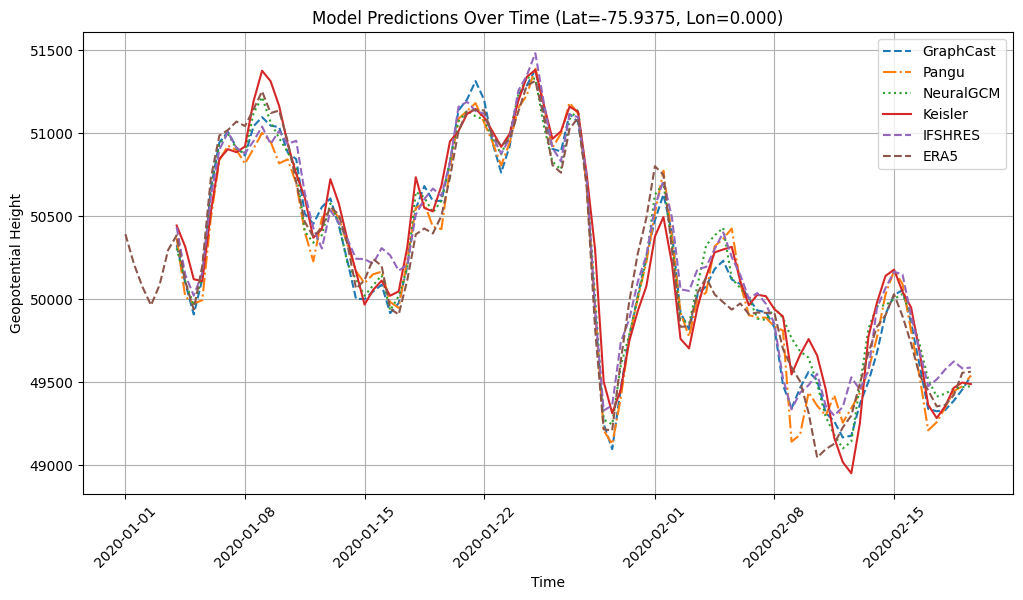

In [25]:
import matplotlib.pyplot as plt

df_filtered = df.query("latitude == -75.9375 and longitude == 0.000").iloc[:100]

# Plot each model’s prediction over time
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["time"], df_filtered["graphcast_lt72"], label="GraphCast", linestyle="--")
plt.plot(df_filtered["time"], df_filtered["pangu_lt72"], label="Pangu", linestyle="-.")
plt.plot(df_filtered["time"], df_filtered["neuralgcm_lt72"], label="NeuralGCM", linestyle=":")
plt.plot(df_filtered["time"], df_filtered["keisler_lt72"], label="Keisler", linestyle="-")
plt.plot(df_filtered["time"], df_filtered["ifshres_lt72"], label="IFSHRES", linestyle="--")
plt.plot(df_filtered["time"], df_filtered["era5"], label="ERA5", linestyle="dashed")


# Formatting
plt.xlabel("Time")
plt.ylabel("Geopotential Height")
plt.title("Model Predictions Over Time (Lat=-75.9375, Lon=0.000)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/MastersProject/Plots/Model_Predictions_Over_Time_(Lat=-75.9375, Lon=0.000)_100time.pdf', dpi=300, bbox_inches="tight")

plt.show()


## Prepare ML Structure

In [ ]:
# @title select features,targets and area weight
X = df[["graphcast_lt72", "pangu_lt72", "neuralgcm_lt72", "keisler_lt72","ifshres_lt72"]]
y = df["era5"]
area_weight = df["area_weight_lt72"]

In [ ]:
# @title Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Outer cross-validation : 5 folds
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Paramter grid for inner cross-validation for hyperparameter tuning
param_grid = {
    'n_estimators':[100],# default is 100 [50, 100, 200]
    'max_depth' : [None], # default is None [None, 10, 20]
    'min_samples_split':[2] # default is 2 [2, 5, 10]
}

# Store outer loop evaluation metrics
outer_results = []

# Outer CV loop
for train_idx, test_idx in outer_cv.split(X):
    X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
    y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]
    weights_train_outer, weights_test_outer = area_weight.iloc[train_idx], area_weight.iloc[test_idx]

    # Inner CV: 3 folds
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Initialize RandomForestRegressor
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Define scoring metrics for regression
    scoring = {
        'r2': 'r2',
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error'
    }

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=inner_cv,
        scoring=scoring,
        refit='r2',
        return_train_score=True,
        n_jobs=-1
    )

    # Fit GridSearchCV on the outer training set with area weights
    grid_search.fit(X_train_outer, y_train_outer, sample_weight=weights_train_outer)

    # Retrieving the best model from the inner loop
    best_model = grid_search.best_estimator_

    # Predict on the outer test set
    y_pred = best_model.predict(X_test_outer)

    # Compute evaluation metrics using sample weights
    mse = mean_squared_error(y_test_outer, y_pred, sample_weight=weights_test_outer)
    mae = mean_absolute_error(y_test_outer, y_pred, sample_weight=weights_test_outer)
    r2 = r2_score(y_test_outer, y_pred, sample_weight=weights_test_outer)

    # Store metrics for this outer fold
    outer_results.append({
        'mse': mse,
        'mae': mae,
        'r2': r2
    })

    print(f"Outer Fold: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

# After outer CV, aggregate the results
mse_vals = [res['mse'] for res in outer_results]
mae_vals = [res['mae'] for res in outer_results]
r2_vals = [res['r2'] for res in outer_results]

print("\nNested Cross-Validation Results:")
print(f"Mean MSE: {np.mean(mse_vals):.4f}")
print(f"Mean MAE: {np.mean(mae_vals):.4f}")
print(f"Mean R² Score: {np.mean(r2_vals):.4f}")


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.0


In [ ]:
# @title Simple Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Outer cross-validation : 5 folds
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Paramter grid for inner cross-validation for hyperparameter tuning
param_grid = {
    'n_estimators':[100],# default is 100 [50, 100, 200]
    'max_depth' : [None], # default is None [None, 10, 20]
    'min_samples_split':[2] # default is 2 [2, 5, 10]
}

# inner loop for tuning the hyperparameters
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)

# outer loop for testing on holdout set
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_inner)

nested_score = cross_validate(clf, X=X, y=y, cv=cv_outer,
                              scoring=('neg_mean_squared_error', 'r2'),
                              params={'sample_weight': area_weight}
                              )


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1023, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1570, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1000, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 517, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 381, in fit
    sample_weight = _check_sample_weight(sample_weight, X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 2181, in _check_sample_weight
    sample_weight = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input sample_weight contains NaN.



In [ ]:
nested_score

{'fit_time': array([531.9479692 , 531.56750607, 516.1149559 , 518.22303653,
        518.959975  ]),
 'score_time': array([2.97287035, 2.96977925, 2.9303968 , 2.94295788, 2.96331978]),
 'test_neg_mean_squared_error': array([-13882.54577621, -13991.31349121, -13857.20556401, -13726.89473194,
        -13782.78230178]),
 'test_r2': array([0.99881571, 0.99880063, 0.99881393, 0.99882931, 0.99881897])}

In [ ]:
# @title Save the trained model

joblib.dump(rf, f"/content/Project26_MLStacking/model/random_forest_model_nested_CV_1.pkl")

print(f"Model saved as random_forest_model_nested_CV_1.pkl")

## Save Data to GDrive

In [ ]:
# @title Save the trained model

joblib.dump(best_model, f"/content/Project26_MLStacking/model/random_forest_model_nested_CV.pkl")

print(f"Model saved as random_forest_model_nested_CV.pkl")


NameError: name 'joblib' is not defined